In [22]:
#import pyart
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
from mpl_toolkits.basemap import Basemap
import pickle
import pyart
#warnings.filterwarnings("ignore")
import h5py
%matplotlib inline

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:44:13.625163. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [2]:
fh = open('/data/ena_terrain.pickle', 'rb')
data_dict = pickle.load(fh)
fh.close()

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:30:18.073123. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
ena_radar = pyart.aux_io.gamic_hdf5.read_gamic(\
'/data/azores_pyart/enaxsaprsecD1.00.20170625.212006.raw.sec_XSAPR2_20170625212006_00.h5')
print(ena_radar.latitude['data'], ena_radar.longitude['data'])
print(ena_radar.fields.keys())
print(ena_radar.fields['reflectivity']['units'])
ena_radar.fields['reflectivity']['units'] = 'dBZ'
ena_radar.fields['corrected_reflectivity']['units'] = 'dBZ'
ena_radar.latitude['data'] = np.array([39.091186111])
ena_radar.longitude['data'] = np.array([-28.02649722]) 

[ 39.090955] [-28.026747]
dict_keys(['differential_reflectivity', 'spectrum_width', 'specific_differential_phase', 'differential_phase', 'corrected_reflectivity', 'corrected_differential_phase', 'cross_correlation_ratio', 'corrected_velocity', 'reflectivity', 'corrected_differential_reflectivity', 'normalized_coherent_power'])
dBZ


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:30:31.133286. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


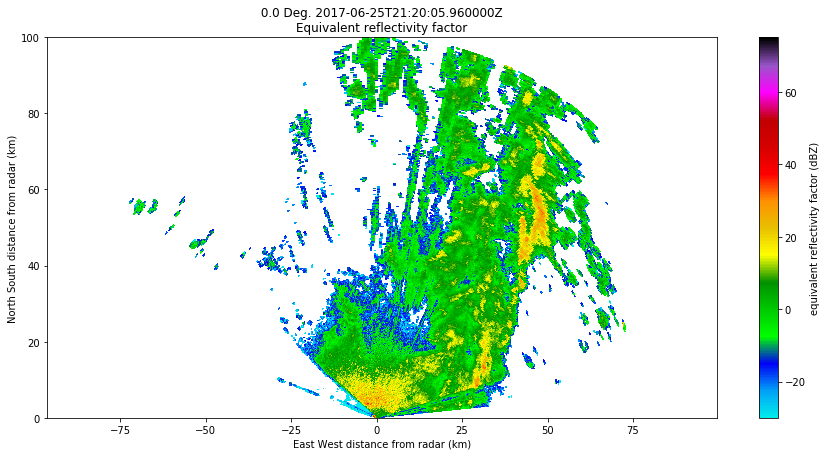

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:32:54.168773. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
fig = plt.figure(figsize = [15,7])
my_disp = pyart.graph.RadarDisplay(ena_radar)
pc = my_disp.plot_ppi('reflectivity', 0)

In [13]:
fig = plt.figure(figsize = [15,7])
my_disp = pyart.graph.RadarDisplay(ena_radar)


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:33:35.207151. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


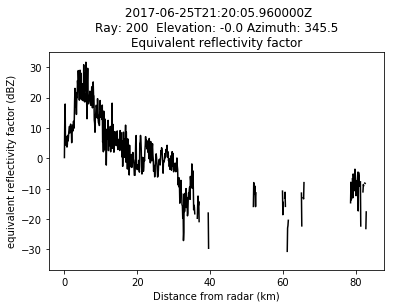

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:33:52.622923. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
lp = my_disp.plot_ray('reflectivity', 200)

In [15]:
unmasked_data = ena_radar.fields['reflectivity']['data'].data

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:34:36.794136. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


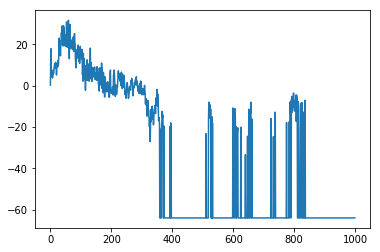

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:35:06.683763. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
plt.plot(unmasked_data[200,:])

In [48]:
ena_radar2 = pyart.aux_io.gamic_hdf5.read_gamic(\
'/data/azores_pyart/enaxsaprsecD1.00.20170701.010006.raw.h5.tar', file_field_names=True)
print(ena_radar2.latitude['data'], ena_radar2.longitude['data'])
print(ena_radar2.fields.keys())
#print(ena_radar2.fields['reflectivity']['units'])


[ 39.090955] [-28.026747]
dict_keys(['Zv', 'UZ', 'Vv', 'Zh', 'KDP', 'SQIv', 'Vh', 'URHOHV', 'SQIh', 'SNRh', 'RHOHV', 'CWh', 'Z', 'PHIDP', 'UZh', 'ZDR', 'UZDR', 'AZh', 'SNRv', 'UZDR1', 'UPHIDP', 'AZDR1', 'UnVv', 'Wh', 'Wv', 'CLASS', 'AZDR', 'CMAP', 'UZv', 'ZDR1', 'UnVh', 'CWv'])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:16:07.065702. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


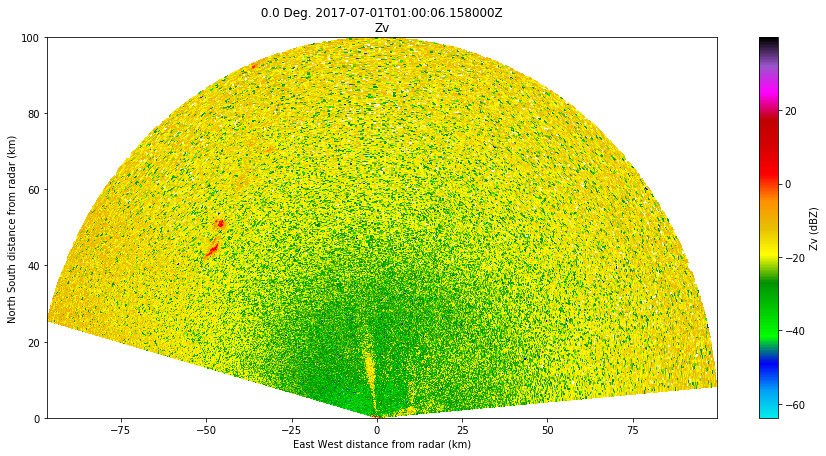

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:24:23.917899. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [62]:
fig = plt.figure(figsize = [15,7])
my_disp = pyart.graph.RadarDisplay(ena_radar2)
pc = my_disp.plot_ppi('Zv', 1,cmap = pyart.graph.cm.NWSRef)
plt.savefig('/Users/scollis/xsapr2_zv.png')

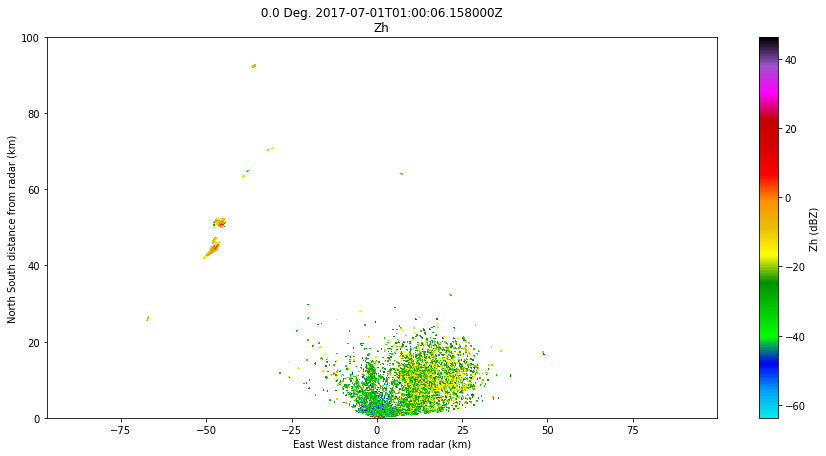

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:24:34.469921. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [63]:
fig = plt.figure(figsize = [15,7])
my_disp = pyart.graph.RadarDisplay(ena_radar2)
pc = my_disp.plot_ppi('Zh', 1,cmap = pyart.graph.cm.NWSRef)
plt.savefig('/Users/scollis/xsapr2_zh.png')

In [20]:
unmasked_data = ena_radar2.fields['reflectivity']['data'].data

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:42:57.936736. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


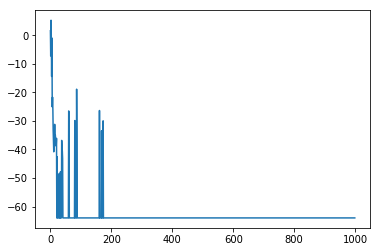

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:43:10.220305. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
plt.plot(unmasked_data[500,:])

In [24]:
f = h5py.File('/data/azores_pyart/enaxsaprsecD1.00.20170625.212006.raw.sec_XSAPR2_20170625212006_00.h5', "r")

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 13:45:49.793075. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [43]:
gg_obj = pyart.aux_io.gamicfile.GAMICFile('/data/azores_pyart/enaxsaprsecD1.00.20170625.212006.raw.sec_XSAPR2_20170625212006_00.h5')

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:13:55.698292. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [44]:
moment_groups = gg_obj.moment_groups()
moment_names = gg_obj.moment_names(moment_groups)


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:14:43.062834. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [46]:
moment_names

['Z',
 'Zh',
 'ZDR1',
 'UZDR1',
 'AZDR1',
 'Vh',
 'Vv',
 'UnVh',
 'UnVv',
 'Wh',
 'Wv',
 'CWh',
 'Zv',
 'CWv',
 'PHIDP',
 'UPHIDP',
 'KDP',
 'RHOHV',
 'URHOHV',
 'SQIh',
 'SQIv',
 'SNRh',
 'SNRv',
 'UZ',
 'CMAP',
 'CLASS',
 'UZh',
 'UZv',
 'AZh',
 'ZDR',
 'UZDR',
 'AZDR']

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:14:52.118565. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [42]:
ff = [f['/scan0'][k].attrs['moment'].decode('utf-8') for
                k in groups]

KeyError: "Can't open attribute (Can't locate attribute: 'moment')"

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-10 14:12:35.993423. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
